### 通过箱形图判断异常值
现有一份消费数据如下，将如下数据绘制成箱形图，并查找数据中的异常值
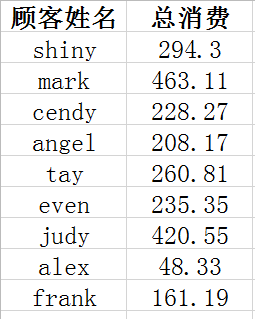

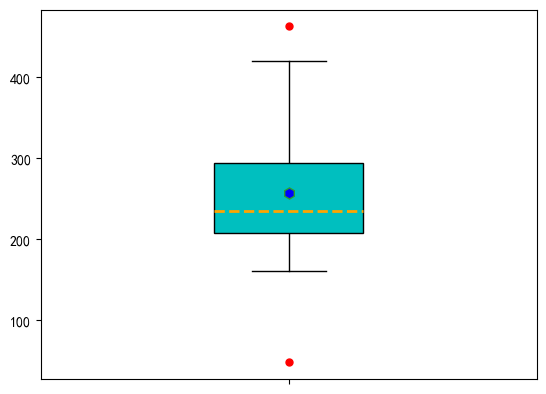

In [2]:
import pandas as pd  # 导入pandas模块
import matplotlib.pyplot as plt  # 导入matplotlib中的pyplot模块

# 导入Excel文件
df = pd.read_excel('./tips.xlsx')
# 手动添加黑体字体，解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 绘制箱形图
plt.boxplot(x=df['总消费'],  # 指定绘制箱形图的数据
            widths =0.3, patch_artist=True,  # 箱子宽度0.3，填充箱体颜色
            # 显示均值，箱子的填充色为蓝绿色
            showmeans=True, boxprops={'facecolor': 'c'},
            # 指定异常值的填充色、边框色和大小
            flierprops={'markerfacecolor': 'r', 'markeredgecolor': 'r', 'markersize': 5},
            # 指定中位数的线条样式（虚线）、线宽和颜色
            medianprops={'linestyle': '--', 'linewidth': 2, 'color': 'orange'},
            # 指定均值点的标记符号（竖六边形）、填充色和大小
            meanprops={'marker': 'h', 'markerfacecolor': 'b', 'markersize': 8},
            labels=[''])  # 去除x轴刻度值
plt.show()  # 显示图表


从箱形图的中位数和上下四分为数的间距可以看出，消费额分布不对称，大部分数据集中在220~300之间；</br>
用平均值去衡量整体情况有时不太合理，用中位数比较稳定，因为中位数不太会收到极值的影响，而平均值则受极值的影响较大；</br>
箱形图中出现了2个异常点，一个顾客消费极低，一个顾客消费较高。

In [3]:
# 计算异常值
import pandas as pd  # 导入pandas模块
import matplotlib.pyplot as plt  # 导入matplotlib中的pyplot模块

# 导入Excel文件
df = pd.read_excel('./tips.xlsx')
# 计算下四分位数和上四分位数
Q1 = df['总消费'].quantile(q=0.25)
Q3 = df['总消费'].quantile(q=0.75)
# 基于1.5倍的四分位数差计算上下限对应的值
low_limit = Q1 - 1.5 * (Q3 - Q1)
up_limit = Q3 + 1.5 * (Q3 - Q1)
#  判断异常值
val = (df['总消费'] > up_limit) | (df['总消费'] < low_limit)
print(df.loc[val])  # 通过loc属性抽取指定行的数据


   顾客姓名     总消费
1  mark  463.11
7  alex   48.33
